In [162]:
import pandas as pd
import numpy as np

In [163]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [164]:
train = pd.read_csv('trainx.csv')


In [165]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [166]:
le = LabelEncoder()
train['Tag'] = le.fit_transform(train['Tag'])
train.drop(['ID','Username'], axis=1,inplace =True)
target = train['Upvotes']

In [167]:
corr=train.corr()

In [168]:
import seaborn as sns

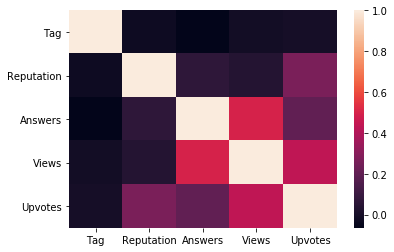

In [169]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [170]:
corr

,Tag,Reputation,Answers,Views,Upvotes
Tag,1.000000,-0.024017,-0.064710,-0.011807,-0.004300
Reputation,-0.024017,1.000000,0.066504,0.036455,0.266710
Answers,-0.064710,0.066504,1.000000,0.498642,0.202033
Views,-0.011807,0.036455,0.498642,1.000000,0.437336
Upvotes,-0.004300,0.266710,0.202033,0.437336,1.000000


In [171]:
train['Answers'].mean()

3.917671832628884

In [172]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=8)
pd_watched = bn.transform([train['Answers']])[0]
train['pd_watched'] = pd_watched

In [173]:
feature_names = ['Tag','Reputation','Answers','Views']
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train[feature_names], target,test_size = 0.21,random_state =205)


In [174]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_val = sc_X.transform(x_val)

In [175]:
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=200)
lin_reg_1.fit(X_poly, y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=200, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [176]:
pred_val = lin_reg_1.predict(poly_reg.fit_transform(x_val))

print(r2_score(y_val, pred_val))

0.9128102744003442


In [177]:
test = pd.read_csv('testx.csv')
ids = test['ID']
test.drop(['ID','Username'], axis=1,inplace =True)
labelencoder_X = LabelEncoder()
test['Tag'] = labelencoder_X.fit_transform(test['Tag'])

In [179]:
test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [178]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=10)
pd_watched = bn.transform([test['Answers']])[0]
test['pd_watched'] = pd_watched
test = sc_X.fit_transform(test)
pred_test = lin_reg_1.predict(poly_reg.fit_transform(test))
pred_test=abs(pred_test)

ValueError: shapes (141448,126) and (70,) not aligned: 126 (dim 1) != 70 (dim 0)

In [134]:
submission = pd.DataFrame({'ID': ids,
                           'Upvotes':pred_test
                           })

submission.to_csv("final_sub04.csv",index=False)